# R

In [22]:
library(data.table)

# Read the CSV
df <- fread("/Users/franco.benites/dm2025b/src/workflows/exp_best_scores.csv")

In [23]:
colnames(df)

[1] "experimento" "date"        "publicScore" "envios"      "semilla"

In [24]:
# Check which column index "orden corrida" is (should be column 2)
print(colnames(df)[2])

# Rename by index
setnames(df, old = 2, new = "orden_corrida")

# Verify the change
colnames(df)

[1] "date"


[1] "experimento"   "orden_corrida" "publicScore"   "envios"       
[5] "semilla"

In [25]:
View(df)

experimento,orden_corrida,publicScore,envios,semilla
<int>,<dttm>,<dbl>,<int>,<int>
9246,2025-09-19 07:23:04,8.176,1900,100379
9249,2025-09-20 14:20:06,7.986,2100,700001
9248,2025-09-20 07:11:26,7.876,2100,250007
9241,2025-09-19 22:40:21,7.756,2300,101111
9253,2025-09-20 16:42:33,7.646,1800,101111
9254,2025-09-20 12:22:34,7.646,1800,250007
9252,2025-09-20 08:48:35,7.606,1800,100379
9244,2025-09-19 05:37:28,7.566,2100,800011
9245,2025-09-19 22:13:08,7.446,2400,237689


In [26]:
#order by experimento
setorder(df, experimento)
#new variable drift
df[, drift := ifelse(experimento >= 9240 & experimento <= 9245, "ipc",
                ifelse(experimento >= 9246 & experimento <= 9251, "rank_cero_fijo",
                       ifelse(experimento >= 9252 & experimento <= 9257, "ninguno", NA_character_)))]
View(df)

experimento,orden_corrida,publicScore,envios,semilla,drift
<int>,<dttm>,<dbl>,<int>,<int>,<chr>
9240,2025-09-19 13:24:44,7.276,1800,100379,ipc
9241,2025-09-19 22:40:21,7.756,2300,101111,ipc
9242,2025-09-19 07:09:13,7.185,2100,250007,ipc
9243,2025-09-19 22:19:37,7.085,2000,700001,ipc
9244,2025-09-19 05:37:28,7.566,2100,800011,ipc
9245,2025-09-19 22:13:08,7.446,2400,237689,ipc
9246,2025-09-19 07:23:04,8.176,1900,100379,rank_cero_fijo
9247,2025-09-19 23:56:20,6.735,2100,101111,rank_cero_fijo
9248,2025-09-20 07:11:26,7.876,2100,250007,rank_cero_fijo


In [12]:
df[, drift := tolower(drift)]
df[, drift := gsub(" ", "_", drift)]

In [13]:
df <- df[!is.na(df$publicScore)]

In [21]:
View(df)

Experimento,orden_corrida,date,publicScore,envios,semilla,num_leaves,min_data_in_leaf,feature_fraction,learning_rate,num_iterations,drift
<int>,<int>,<dttm>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
9116,1,NA,6.435,2400,100379,60,2100,1.0000000,0.10000000,1032,dolar_blue
9105,1,NA,7.506,1900,100379,256,4940,1.0000000,0.10000000,1139,ipc
9203,1,2025-09-11 23:22:51,6.885,1900,100379,189,8188,1.0000000,0.10000000,502,ninguno
9111,1,NA,6.225,1800,100379,256,2967,1.0000000,0.10000000,746,nucleo
9208,1,2025-09-12 08:28:59,3.873,1800,100379,168,27,1.0000000,0.10000000,1367,rank__simple
9218,1,2025-09-14 03:07:27,7.045,2400,100379,149,1256,0.2886525,0.01406128,386,rank_cero_fijo
9121,1,NA,7.446,1800,100379,NA,NA,1.0000000,0.10000000,NA,std
9117,2,NA,6.505,1800,101111,202,4281,1.0000000,0.10000000,215,dolar_blue
9107,2,NA,7.316,1900,101111,241,2727,1.0000000,0.10000000,779,ipc


In [27]:


# Order the entire dataset by orden_corrida
setorder(df, semilla)

# Print head of data
head(df)

# Get unique drift methods
drift_methods <- unique(df$drift)
print(drift_methods)

# Create ordered score vectors for each drift method
get_ordered_scores <- function(drift_method) {
  subset_df <- df[drift == drift_method]
  setorder(subset_df, orden_corrida)  # Ensure ordering within each method
  return(subset_df$publicScore)
}

# Create score_by_drift with proper ordering
score_by_drift <- list()
for(method in drift_methods) {
  if(method %in% df$drift) {
    score_by_drift[[method]] <- get_ordered_scores(method)
  }
}

# Print what we have
print(names(score_by_drift))
print(sapply(score_by_drift, length))

# Updated comparison function with paired tests using shortest length
compare_methods <- function(method1, method2) {
  scores1 <- as.numeric(score_by_drift[[method1]])
  scores2 <- as.numeric(score_by_drift[[method2]])
  
  # Get the minimum length to ensure paired comparison
  min_length <- min(length(scores1), length(scores2))
  
  # Truncate both vectors to the same length
  scores1_paired <- scores1[1:min_length]
  scores2_paired <- scores2[1:min_length]
  
  # Always use paired test now
  wt <- wilcox.test(scores1_paired, scores2_paired, paired = TRUE)
  
  pvalue <- wt$p.value
  
  out <- "NOT-SIGNIFICANT"
  if (pvalue < 0.05 && mean(scores1_paired) > mean(scores2_paired)) {
    out <- paste(method1, "WINS")
  } else if (pvalue < 0.05 && mean(scores1_paired) < mean(scores2_paired)) {
    out <- paste(method2, "WINS")
  }
  
  return(data.frame(
    method1 = method1,
    method2 = method2,
    n_compared = min_length,  # Show how many pairs were compared
    pvalue = round(pvalue, 6),
    mean1 = round(mean(scores1_paired), 3),
    mean2 = round(mean(scores2_paired), 3),
    diff = round(mean(scores1_paired) - mean(scores2_paired), 3),
    result = out,
    stringsAsFactors = FALSE
  ))
}

# The rest of the code remains the same...
# Get all unique pairs and run comparisons
methods <- names(score_by_drift)
pairs <- expand.grid(method1 = methods, method2 = methods, stringsAsFactors = FALSE)
pairs <- pairs[pairs$method1 < pairs$method2, ]

# Run all pairwise comparisons
results <- do.call(rbind, 
  lapply(1:nrow(pairs), function(i) {
    compare_methods(pairs$method1[i], pairs$method2[i])
  })
)

# Sort results by p-value to see most significant first
setorder(results, pvalue)

# Print results
print(results)

# Summary statistics by method
summary_stats <- df[, .(
  count = .N,
  mean_score = round(mean(publicScore, na.rm = TRUE), 3),
  median_score = round(median(publicScore, na.rm = TRUE), 3),
  sd_score = round(sd(publicScore, na.rm = TRUE), 3),
  min_score = round(min(publicScore, na.rm = TRUE), 3),
  max_score = round(max(publicScore, na.rm = TRUE), 3)
), by = drift]

setorder(summary_stats, -mean_score)
print("\nSummary by drift method:")
print(summary_stats)

# Find best performing method
best_method <- summary_stats[1, drift]
cat("\nBest performing method:", best_method, "with mean score:", summary_stats[1, mean_score], "\n")



experimento,orden_corrida,publicScore,envios,semilla,drift
<int>,<dttm>,<dbl>,<int>,<int>,<chr>
9240,2025-09-19 13:24:44,7.276,1800,100379,ipc
9246,2025-09-19 07:23:04,8.176,1900,100379,rank_cero_fijo
9252,2025-09-20 08:48:35,7.606,1800,100379,ninguno
9241,2025-09-19 22:40:21,7.756,2300,101111,ipc
9247,2025-09-19 23:56:20,6.735,2100,101111,rank_cero_fijo
9253,2025-09-20 16:42:33,7.646,1800,101111,ninguno


[1] "ipc"            "rank_cero_fijo" "ninguno"       
[1] "ipc"            "rank_cero_fijo" "ninguno"       
           ipc rank_cero_fijo        ninguno 
             6              6              5 
  method1        method2 n_compared pvalue mean1 mean2   diff          result
2 ninguno rank_cero_fijo          5 0.4375 7.322 7.606 -0.284 NOT-SIGNIFICANT
1     ipc rank_cero_fijo          6 0.6875 7.386 7.492 -0.107 NOT-SIGNIFICANT
3     ipc        ninguno          5 1.0000 7.312 7.322 -0.010 NOT-SIGNIFICANT
[1] "\nSummary by drift method:"
            drift count mean_score median_score sd_score min_score max_score
           <char> <int>      <num>        <num>    <num>     <num>     <num>
1: rank_cero_fijo     6      7.492        7.566    0.602     6.735     8.176
2:            ipc     6      7.386        7.361    0.251     7.085     7.756
3:        ninguno     5      7.322        7.606    0.433     6.745     7.646

Best performing method: rank_cero_fijo with mean score: 7.492 


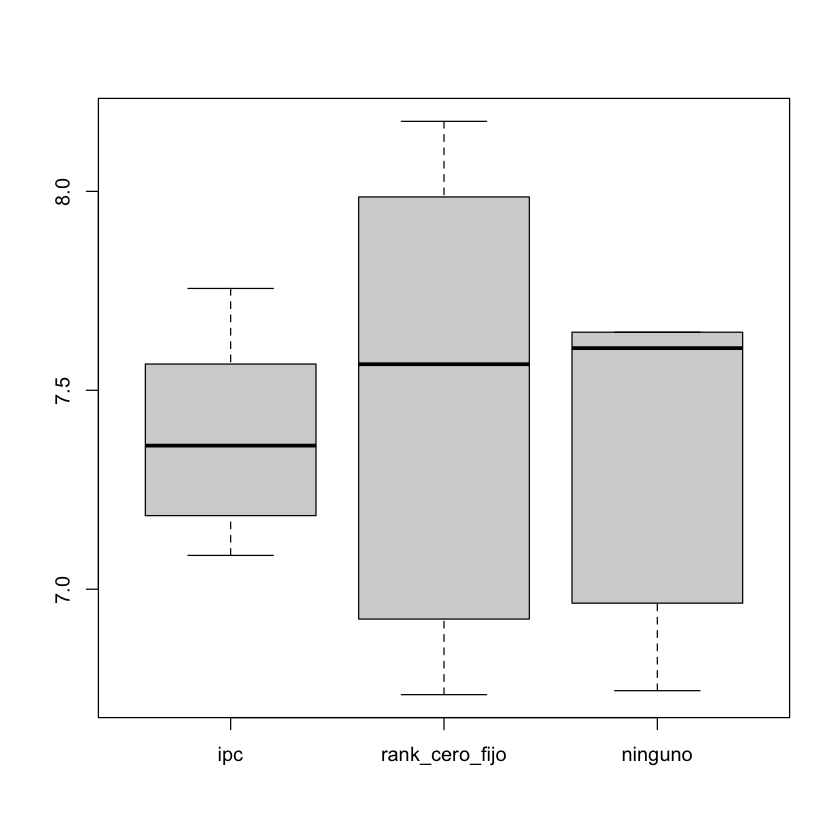

In [28]:
#plot the vectors of the drift methods on a boxplot
boxplot(score_by_drift)
